### LORENZ TEST

In [165]:
import utils
import importlib
importlib.reload(utils)

lorenz,lorenz_time=utils.time_dynamic_system(epoch=120000,delta_t=0.02,system=utils.dynamic_lorenz)
lorenz_x,lorenz_y,lorenz_z=lorenz

In [167]:
import model
importlib.reload(model)

RP_lorenz = model.reservoirModel('lorenz.config')
print("W_out before_training:\n",RP_lorenz.W_out)
RP_lorenz.training()
print("W_out after_training:\n",RP_lorenz.W_out)

output_lorenz,_=RP_lorenz.run_by_self()

forced_output_lorenz,_ = RP_lorenz.run_with_input()


W_out before_training:
 tensor([[0.4167, 0.0191, 0.6310],
        [0.7831, 0.4592, 0.9806],
        [0.2891, 0.6375, 0.4749],
        ...,
        [0.3606, 0.6790, 0.2490],
        [0.9553, 0.7378, 0.5431],
        [0.1197, 0.5203, 0.1438]], dtype=torch.float64)


/home/bfish/projects/reservoir2/model.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ### get corresponding input ###
/home/bfish/projects/reservoir2/model.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ### update reservoir state ###
/home/bfish/projects/reservoir2/model.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # against the references from [t_0=1,t_e=e+1]


W_out after_training:
 tensor([[-0.0162, -0.0398, -0.0560],
        [ 0.0885, -0.1253,  0.0124],
        [-0.1651, -0.0615, -0.0981],
        ...,
        [ 0.2102, -0.2166,  0.6292],
        [ 0.2938, -0.2780, -0.7141],
        [ 0.0372, -0.0058,  0.0201]], dtype=torch.float64)


/home/bfish/projects/reservoir2/model.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ### get corresponding input ###
/home/bfish/projects/reservoir2/model.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ### update reservoir state ###


[25.         24.92016654 24.09149447 ...  9.42121318  8.39439722
  7.40558567] tensor([21.1661, 30.8540, 28.1658], dtype=torch.float64)


/tmp/ipykernel_52160/3444081388.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output_lorenz),torch.tensor(lorenz).T,lorenz_time,1)


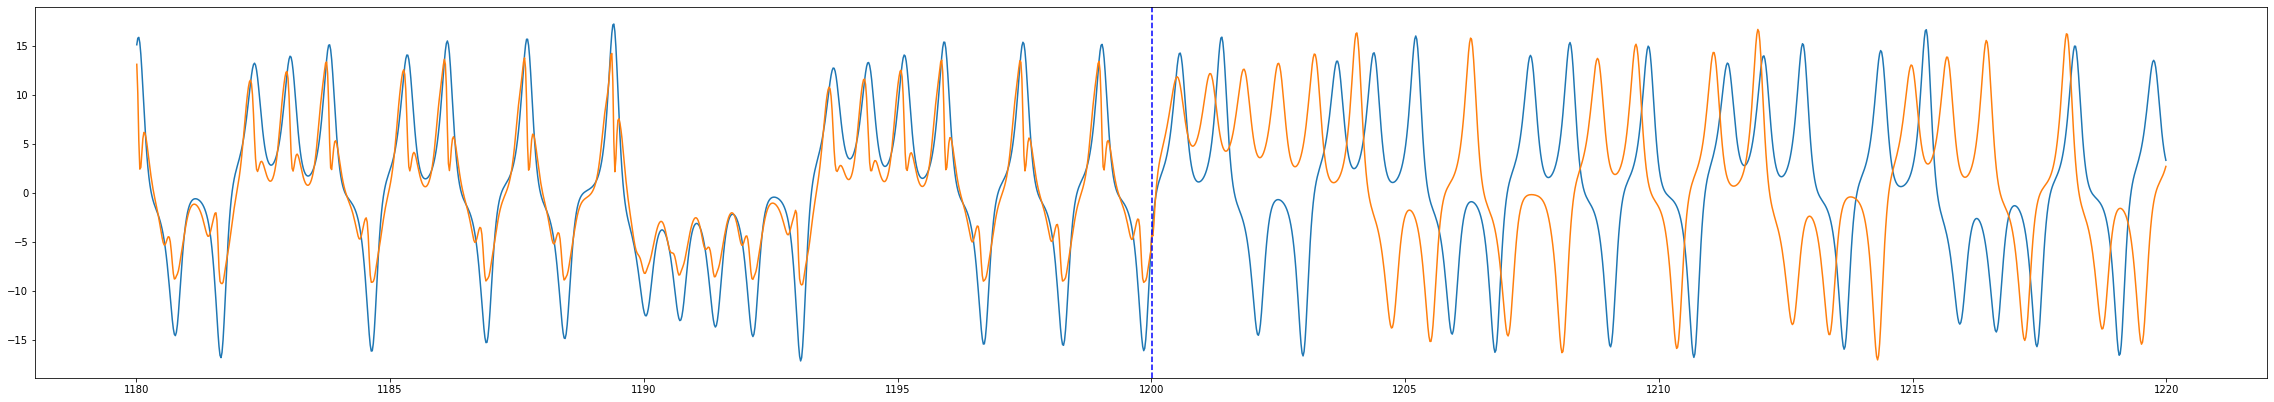

In [205]:
import torch
import numpy as np
importlib.reload(utils)
print(lorenz[0],output_lorenz[0])
#utils.plot_time_sequence(RP_lorenz.training_time,RP_lorenz.training_time+1000,RP_lorenz.training_time,RP_lorenz.f,torch.tensor(output_lorenz),torch.tensor(lorenz).T,time,3)
lorenz_time=np.linspace(0,RP_lorenz.run_time*RP_lorenz.d_t,RP_lorenz.run_time)
utils.plot_time_sequence(RP_lorenz.training_time-1000,RP_lorenz.training_time+1000,RP_lorenz.training_time,RP_lorenz.f,
                         torch.tensor(output_lorenz),torch.tensor(lorenz).T,lorenz_time,1)

# import numpy as np
# import matplotlib.pyplot as plt
# fig2=plt.figure()
# fig2.set_figwidth(40)
# fig2.set_figheight(15)

# print(output[0])
# plt.subplot(311)
# plt.plot(time[1000:1200],lorenz_x[1000:1200])
# plt.plot(time[1000:1200],(output.T[0][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[0][1005:1205])
# plt.subplot(312)
# plt.plot(time[1000:1200],lorenz_y[1000:1200])
# plt.plot(time[1000:1200],(output.T[1][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[1][1005:1205])
# plt.subplot(313)
# plt.plot(time[1000:1200],lorenz_z[1000:1200])
# plt.plot(time[1000:1200],(output.T[2][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[2][1005:1205])
# plt.show()

### MACKEY-GLASS TEST

In [180]:
import model
importlib.reload(model)

RP_mg = model.reservoirModel('mackey_glass.config')
print("W_out before_training:\n",RP_mg.W_out)
RP_mg.training()
print("W_out after_training:\n",RP_mg.W_out)

output_mg,_=RP_mg.run_by_self()

forced_output_mg,_ = RP_mg.run_with_input()

W_out before_training:
 tensor([[4.4711e-01],
        [1.2543e-02],
        [9.1064e-02],
        [8.8068e-01],
        [9.6022e-01],
        [5.5601e-01],
        [4.8660e-01],
        [4.7790e-01],
        [6.5428e-01],
        [3.8725e-01],
        [2.9667e-01],
        [9.1954e-01],
        [5.4012e-01],
        [3.1074e-01],
        [4.2668e-01],
        [9.1945e-01],
        [1.6776e-01],
        [5.2501e-01],
        [7.5513e-01],
        [6.2831e-01],
        [6.6931e-01],
        [5.6457e-01],
        [6.9258e-01],
        [7.3997e-01],
        [6.5889e-01],
        [4.2543e-01],
        [5.3724e-01],
        [1.8999e-01],
        [5.7656e-01],
        [3.3380e-02],
        [7.1231e-02],
        [1.3902e-01],
        [5.3805e-01],
        [2.6847e-01],
        [7.0897e-02],
        [8.1898e-01],
        [2.3286e-01],
        [9.5314e-01],
        [5.3761e-01],
        [6.4477e-01],
        [6.2959e-01],
        [6.2721e-01],
        [4.4211e-01],
        [4.7449e-01],
        

/home/bfish/projects/reservoir2/model.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.system_input[epoch])
/home/bfish/projects/reservoir2/model.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(torch.tensor(np.tanh(torch.tensor(np.dot(self.W_reservoir,prev))+torch.tensor(feed_to_reservoir))))
/home/bfish/projects/reservoir2/model.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reference_outputs = torch.tensor(self.system_input[1:self.training_time+1])


W_out after_training:
 tensor([[ 1.3096e-02],
        [ 3.7009e-03],
        [-7.0736e-03],
        [-3.0628e-02],
        [ 1.5240e-02],
        [ 1.7272e-02],
        [-9.7214e-03],
        [-1.8803e-03],
        [ 1.1394e-02],
        [-7.7886e-03],
        [-5.3965e-03],
        [ 8.7637e-03],
        [ 3.3290e-02],
        [-1.3510e-02],
        [ 1.1343e-02],
        [ 1.6640e-02],
        [ 1.3055e-02],
        [-2.5217e-02],
        [-5.1670e-02],
        [ 2.0404e-02],
        [ 1.2657e-02],
        [-6.2603e-03],
        [ 1.4282e-02],
        [-6.7430e-03],
        [ 6.2947e-03],
        [-2.6430e-02],
        [-6.3085e-03],
        [-2.8011e-02],
        [ 2.0918e-02],
        [ 1.5612e-02],
        [-1.3971e-03],
        [ 1.7724e-02],
        [ 3.2231e-02],
        [ 1.9358e-02],
        [ 2.9501e-02],
        [-1.7223e-02],
        [-3.0779e-03],
        [ 1.2716e-02],
        [ 1.3128e-02],
        [-2.7748e-02],
        [-1.9993e-03],
        [-2.1255e-02],
        [ 5

/home/bfish/projects/reservoir2/model.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.output[-1])
/home/bfish/projects/reservoir2/model.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(torch.tensor(np.tanh(torch.tensor(np.dot(self.W_reservoir,prev))+torch.tensor(feed_to_reservoir))))


/tmp/ipykernel_52160/3240833993.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  utils.plot_time_sequence(RP_mg.training_time-1000,RP_mg.training_time+1000,RP_mg.training_time,RP_mg.f,torch.tensor(output_mg),torch.tensor(sequence).T,time,1)


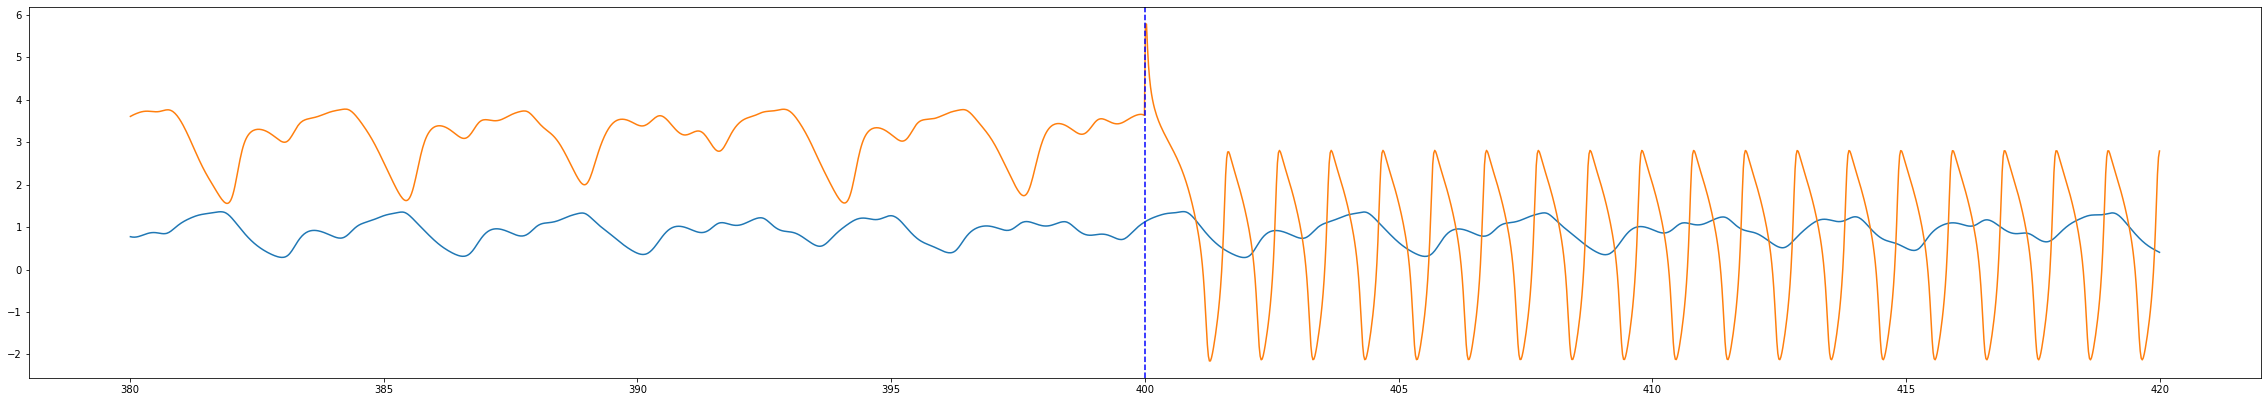

In [182]:
import torch
importlib.reload(utils)
#plot of train-and-auto-run
utils.plot_time_sequence(RP_mg.training_time-1000,RP_mg.training_time+1000,RP_mg.training_time,RP_mg.f,torch.tensor(output_mg),torch.tensor(sequence).T,time,1)
#plotting a clip from output generated by continued input into trained model
#utils.plot_time_sequence(2000,4000,RP_mg.training_time,RP_mg.f,torch.tensor(forced_output_mg),torch.tensor(sequence).T,time,1)


#utils.plot_time_sequence(0,RP.run_time,RP.f,p,s,time,1)